<a href="https://colab.research.google.com/github/JEpstein-1prime/CMA/blob/main/Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()   # Select file1
df1 = pd.read_csv(next(iter(uploaded)))

Saving data.csv to data.csv


In [ ]:
import pandas as pd


data = pd.read_csv("data.csv")


print(data.head())

         Response ID  study  cond  party  CHANGE  1N  2N  3N  4N  5N  ...  \
0         Over_Under    NaN   NaN    NaN     NaN   1   1   1   0   0  ...   
1    Support_Against    NaN   NaN    NaN     NaN   1   1   1   1   1  ...   
2        Dem_Rep_Ind    NaN   NaN    NaN     NaN   3   3   3   3   3  ...   
3  R_01kEGd8c7dcUnVD    2.0   1.0    2.0     NaN  18 -26  12 -10  11  ...   
4  R_0c7IHBK0ObpK70l    2.0   1.0    1.0     NaN -34  18 -19  17  -1  ...   

   8R.2  9R.2  10R.2  11R.2  12R.2  Unnamed: 115  BeliefResistance  \
0     1     1      0      0      0           NaN               NaN   
1     0     0      0      0      0           NaN               NaN   
2     2     2      2      2      2           NaN               NaN   
3    70    19     70     60     30           NaN          4.000000   
4    72    26     28     75     68           NaN          2.666667   

   SupportTrump  PartyStrength  votereg  
0           NaN            NaN      NaN  
1           NaN            NaN  

In [ ]:
print(df.columns.tolist())


['Dem_Rep_Ind', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', '3', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '3.10', '3.11', '1', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '1.10', '1.11', '2', '2.1', '2.2', '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '2.10', '2.11', 'Unnamed: 41', '3.12', '3.13', '3.14', '3.15', '3.16', '3.17', '3.18', '3.19', '3.20', '3.21', '3.22', '3.23', '1.12', '1.13', '1.14', '1.15', '1.16', '1.17', '1.18', '1.19', '1.20', '1.21', '1.22', '1.23', '2.12', '2.13', '2.14', '2.15', '2.16', '2.17', '2.18', '2.19', '2.20', '2.21', '2.22', '2.23', 'Unnamed: 78', '3.24', '3.25', '3.26', '3.27', '3.28', '3.29', '3.30', '3.31', '3.32', '3.33', '3.34', '3.35', '1.24', '1.25', '1.26', '1.27', '1.28', '1.29', '1.30', '1.31', '1.32', '1.33', '1.34', '1.35', '2.24', '2.25', '2.26', '2.27', '2.28', '2.29', '2.30', '2.31', '2.32', '2.33', '2.34', '2.35', 'Unnamed: 115', 'Unnamed: 116', 'Unnamed: 117', 'Unnamed: 118', 'Unnam

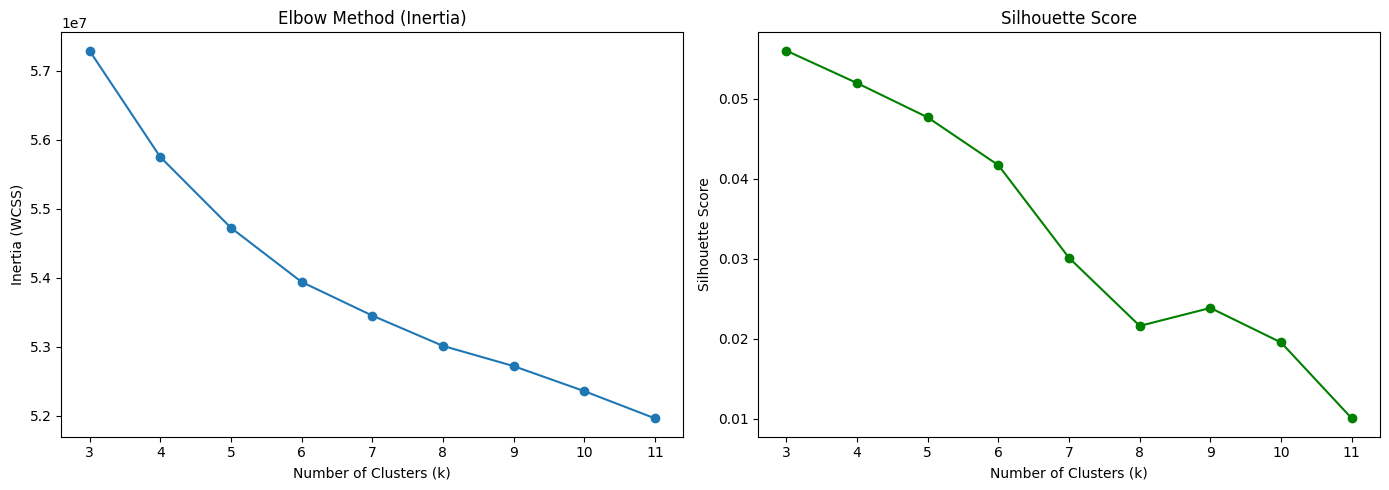

✅ Best k by silhouette score: 3 (score = 0.0560)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


#  Load data

df = pd.read_csv("data.csv", skiprows=3)
df.columns = df.columns.astype(str).str.strip()


# Define Change + BeliefResistance columns

change_cols = [
    '3', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '3.10', '3.11',
    '1', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '1.10', '1.11',
    '2', '2.1', '2.2', '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '2.10', '2.11'
]
belief_col = "Unnamed: 116"


# Convert to numeric, drop missing

# Ensure numeric
df[change_cols + [belief_col]] = df[change_cols + [belief_col]].apply(pd.to_numeric, errors='coerce')

# Drop rows missing any change column or BeliefResistance
df_clean = df.dropna(subset=change_cols + [belief_col])

# Rename for  reference
df_clean = df_clean.rename(columns={belief_col: "BeliefResistance"})


X_change = df_clean[change_cols].to_numpy()
X_resistance = df_clean["BeliefResistance"].to_numpy().reshape(-1, 1)
X = np.hstack([X_change, X_resistance])


#  KMeans loop with evaluation

silhouette_scores = []
inertia_values = []
k_range = range(3, 12)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)

    inertia = kmeans.inertia_
    inertia_values.append(inertia)

    silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
    silhouette_scores.append(silhouette)


#  Plot: Elbow + Silhouette

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Elbow
ax[0].plot(k_range, inertia_values, marker='o')
ax[0].set_title("Elbow Method (Inertia)")
ax[0].set_xlabel("Number of Clusters (k)")
ax[0].set_ylabel("Inertia (WCSS)")

# Silhouette
ax[1].plot(k_range, silhouette_scores, marker='o', color='green')
ax[1].set_title("Silhouette Score")
ax[1].set_xlabel("Number of Clusters (k)")
ax[1].set_ylabel("Silhouette Score")

plt.tight_layout()
plt.show()


#  Report best k

best_k = k_range[np.argmax(silhouette_scores)]
print(f"✅ Best k by silhouette score: {best_k} (score = {max(silhouette_scores):.4f})")


The curve drops sharply from 3 → 5, then flattens around 6–8 This means adding more clusters beyond 6 doesn't improve the model much. Peak at k=3 → best silhouette score (≈0.56)


Dropdown(description='Cluster:', index=2, options=(np.int32(0), np.int32(1), np.int32(2)), value=np.int32(2))

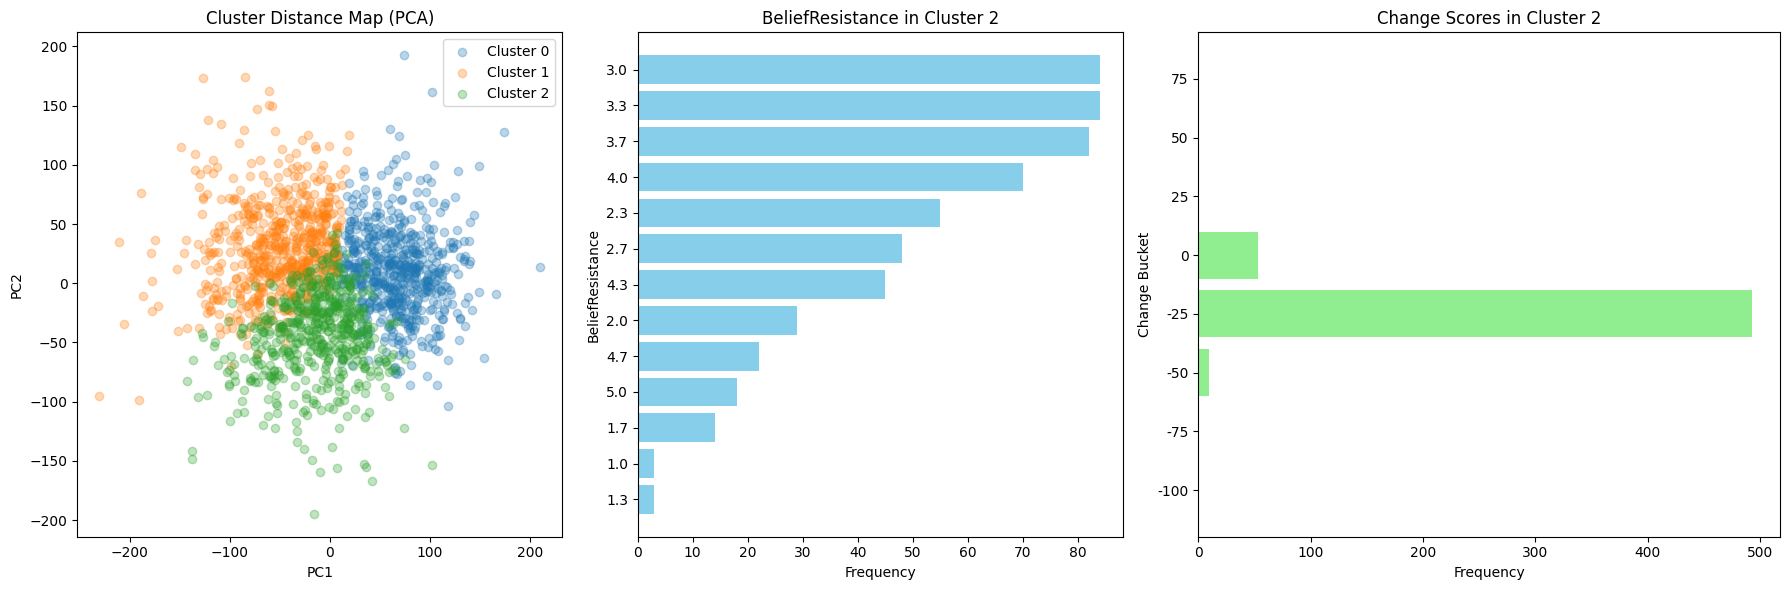

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import ipywidgets as widgets
from IPython.display import display, clear_output


df = pd.read_csv("data.csv", skiprows=3)
df.columns = df.columns.astype(str).str.strip()

# Define columns
change_cols = [
    '3', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '3.10', '3.11',
    '1', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '1.10', '1.11',
    '2', '2.1', '2.2', '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '2.10', '2.11'
]
belief_col = "Unnamed: 116"

# Convert to numeric
df[change_cols + [belief_col]] = df[change_cols + [belief_col]].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df_clean = df.dropna(subset=change_cols + [belief_col])
df_clean = df_clean.rename(columns={belief_col: "BeliefResistance"})


# Feature matrix & clustering


X_change = df_clean[change_cols].to_numpy()
X_resistance = df_clean["BeliefResistance"].to_numpy().reshape(-1, 1)
X_full = np.hstack([X_change, X_resistance])

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean["Cluster"] = kmeans.fit_predict(X_full)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_full)
df_clean["PC1"] = X_pca[:, 0]
df_clean["PC2"] = X_pca[:, 1]

# Compute average "Change" for plotting
df_clean["Change"] = df_clean[change_cols].mean(axis=1)


# Define interactive plot


def plot_cluster_and_belief(cluster_id):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 1, 1.2]})

    # LEFT: PCA cluster plot
    ax_left = axes[0]
    for cid in sorted(df_clean["Cluster"].unique()):
        cluster_data = df_clean[df_clean["Cluster"] == cid]
        ax_left.scatter(cluster_data["PC1"], cluster_data["PC2"], alpha=0.3, label=f"Cluster {cid}")
    ax_left.set_title("Cluster Distance Map (PCA)")
    ax_left.set_xlabel("PC1")
    ax_left.set_ylabel("PC2")
    ax_left.legend()

    # MIDDLE: BeliefResistance distribution
    ax_middle = axes[1]
    selected = df_clean[df_clean["Cluster"] == cluster_id]
    top_resistance = selected["BeliefResistance"].round(1).value_counts().sort_values(ascending=True)
    ax_middle.barh(top_resistance.index.astype(str), top_resistance.values, color='skyblue')
    ax_middle.set_title(f"BeliefResistance in Cluster {cluster_id}")
    ax_middle.set_xlabel("Frequency")
    ax_middle.set_ylabel("BeliefResistance")

    # RIGHT: Change histogram binned
    ax_right = axes[2]
    bins = [-100, -75, -50, -25, 0, 25, 50, 75, 100]
    bin_labels = ['-100', '-75', '-50', '-25', '0', '25', '50', '75', '100']
    change_binned = pd.cut(selected["Change"], bins=bins, labels=bin_labels[:-1], include_lowest=True)
    change_counts = change_binned.value_counts().sort_index()
    ax_right.barh(change_counts.index.astype(str), change_counts.values, color='lightgreen')
    ax_right.set_title(f"Change Scores in Cluster {cluster_id}")
    ax_right.set_xlabel("Frequency")
    ax_right.set_ylabel("Change Bucket")

    plt.tight_layout()
    plt.show()


# Interactive widget


cluster_dropdown = widgets.Dropdown(
    options=sorted(df_clean["Cluster"].unique()),
    description='Cluster:',
    value=0
)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output(wait=True)
        display(cluster_dropdown)
        plot_cluster_and_belief(change['new'])

cluster_dropdown.observe(on_change)


# Launch plot


display(cluster_dropdown)
plot_cluster_and_belief(cluster_dropdown.value)


The X-axis (PC1) and Y-axis (PC2) represent the first two principal components from PCA, which are linear combinations of your 36 Change variables and BeliefResistance. PC1 explains the most variance, and PC2 explains the second most, orthogonal to PC1. The scatterplot is a 2D projection of the high-dimensional clustering space, not showing real-world variables directly.

Left Panel: 2D PCA scatter plot of respondents.
Middle Panel: Bar chart of BeliefResistance within each cluster.
Right Panel: Binned histogram of average Change scores within clusters, using bins like [-100, -75, -50, -25, 0, 25, 50, 75, 100].

How do unsupervised learning models contribute to your task?


Unsupervised learning models are used in this task for clustering and dimensionality reduction. Specifically, K-Means clustering groups data points with similar features (based on change columns and belief resistance), while PCA is used for reducing dimensionality to visualize the clusters effectively in a 2D space. These techniques help reveal underlying patterns or structures in the data--identifying groups of response values based on the changes recorded.

Which model(s) do you use?


K-Means: This algorithm groups the data points into clusters based on their feature similarity. It's used to identify patterns in how "changes" and "belief resistance" are related.

PCA (Principal Component Analysis): This is used for dimensionality reduction, mapping the high-dimensional data into two principal components for easier visualization of clusters.


For each model, what parameter settings do you choose?
K-Means: n_clusters=3: The number of clusters is set to 3 based on the elbow plot and silhouette scores.  


PCA: n_components=2: This reduces the dimensionality of the data to two principal components for easy 2D visualization.


How do you choose k for K-Means algorithm; how do you decide the number of clusters for LDA, etc.?

For K-Means, the number of clusters is determined using both the Elbow Method (via inertia) and the Silhouette Score: Elbow Method: Inertia (Within-Cluster Sum of Squares) is plotted against the number of clusters. The "elbow" of the plot indicates the ideal number of clusters where adding more clusters doesn't significantly reduce inertia.

Silhouette Score: This measures how well-separated the clusters are. A higher silhouette score indicates better clustering. The optimal k is chosen as the value that maximizes the silhouette score (closest value to 1).

Qualitative Evaluation: The clustering results are visualized using PCA. The clusters are fairly well-separated in the PCA plot indicating that the algorithm has effectively grouped similar data points. What is interesting, is that if we sum the first 5 Belief Resistance scores associated with each cluster, we see that cluster 0, perhaps the most progressive in updating "positively" has the highest resistance score of 18.3, followed by cluster 3, the most "negative" in updating, with a 16.3 resistance, and the "moderate" group summing to the least resistance of 15. This shows that negative/no change, may not be associated so purely with resistance, challenging many existing studies.


Quantitative Evaluation: The Silhouette Score and Inertia are quantitative metrics. A high silhouette score (closer to +1) indicates well-separated clusters. Inertia should decrease as the number of clusters increases, but after a certain point, it stabilizes (forming the elbow), approximately around k = 3.


What insights do you draw from the model outputs?

The K-Means clustering and PCA visualization illustrate how the data points (individuals' beliefs) cluster according to their change behavior and belief resistance. For instance, the cluster distribution helps identify whether certain behaviors or levels of belief resistance correlate with distinct patterns in the data. The plots also display the frequency of belief resistance values and changes within each cluster, providing additional insight into the behavior of the clusters.

If supervised learning models were applied, the insights gained from unsupervised methods (like clustering) could inform feature selection or model interpretation. For instance, if K-Means revealed that certain clusters have specific belief resistance levels, we might use this information as a feature for supervised learning models (e.g., classification). The unsupervised findings can serve as a pre-processing step to better understand the underlying structure of the data before applying supervised techniques.
The findings would be complementary: Unsupervised learning helps explore and group the data, while supervised learning could be used to predict or classify based on these groups or clusters.
